In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter

np.set_printoptions(suppress=True)

In [3]:
%matplotlib inline

In [4]:
from togetherflow.old.initial_conditions import (
    initialize_agents,
    initialize_beacons
)

from togetherflow.old.influences import (
    rotation_influence,
    position_influence,
    alignment_influence,
    cohesion_influence
)

from togetherflow.old.simulations import (
    look_at_beacon,
    move_to_beacon,
    look_with_neighbors,
    move_with_neighbors,
    individual_motion,
    collective_motion,
    motion_simulation
)

from togetherflow.old.diagnostics import (
    inspect_initialization,
    inspect_simulation,
    inspect_rotation_influence,
    inspect_position_influence,
    inspect_alignment_influence,
    inspect_cohesion_influence,
    inspect_individual_motion,
    prepare_figure
)

In [4]:
agent_pos, agent_rot = initialize_agents(num_agents=59, room_size=(8, 10))
beacon_pos = initialize_beacons(room_sensing_range=20, num_beacons=20)

agent_rot

array([[-1.273183  ],
       [ 2.7615025 ],
       [ 1.613858  ],
       [-1.4366062 ],
       [-1.4371874 ],
       [-2.1766462 ],
       [ 2.4619744 ],
       [-1.1327219 ],
       [-0.70357317],
       [ 1.95694   ],
       [-1.7367426 ],
       [-0.3531512 ],
       [-3.0113392 ],
       [-0.509906  ],
       [ 2.4259682 ],
       [-1.6511315 ],
       [-1.6256695 ],
       [ 3.1097875 ],
       [-3.0797734 ],
       [-2.9301364 ],
       [ 0.22682476],
       [-1.2068608 ],
       [ 2.3513424 ],
       [-2.805449  ],
       [-3.0635264 ],
       [-1.541667  ],
       [-1.8367804 ],
       [-2.8602643 ],
       [-2.0084262 ],
       [-0.09189001],
       [-1.184983  ],
       [ 2.8677833 ],
       [-2.0894427 ],
       [-3.0356402 ],
       [ 2.5404556 ],
       [ 0.15506592],
       [ 2.3924606 ],
       [-2.1112578 ],
       [-1.2611713 ],
       [-2.1278615 ],
       [-1.8272126 ],
       [ 2.0085676 ],
       [ 0.11088073],
       [-0.83703125],
       [ 1.3833457 ],
       [-2

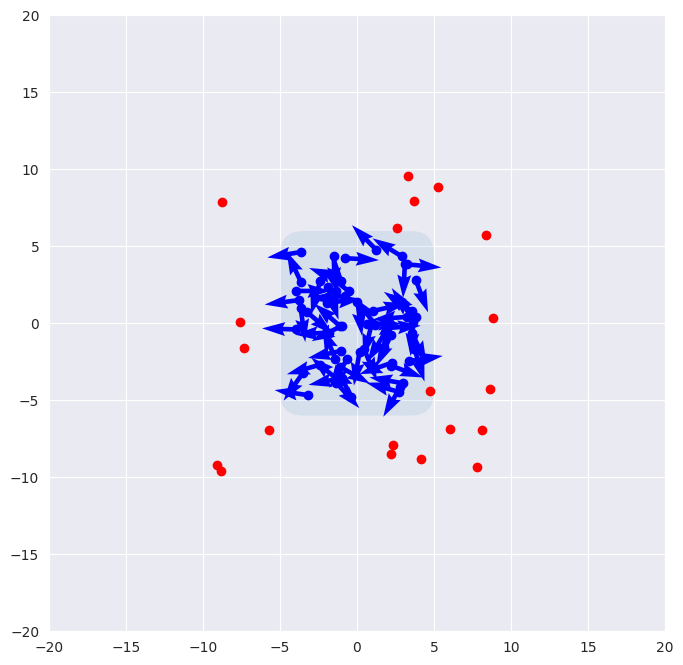

In [5]:
f = inspect_initialization(agent_pos, agent_rot, beacon_pos)

In [6]:
sim = motion_simulation(timesteps=600)
print(sim.shape)
sim[:,:,-1]

(600, 12, 3)


array([[5.10590345, 5.49797851, 1.36032355, ..., 3.05585194, 3.64854628,
        0.69805819],
       [5.15181631, 5.52978439, 1.34169054, ..., 2.98199344, 3.57353861,
        0.70040923],
       [5.19653303, 5.56088913, 1.32350469, ..., 2.91000247, 3.50061232,
        0.70258307],
       ...,
       [2.97319698, 2.96673989, 2.96684146, ..., 2.90363288, 3.24818546,
        3.14130354],
       [2.96589732, 2.95946765, 2.95954657, ..., 2.91206169, 3.25674302,
        3.14130259],
       [2.97325253, 2.96680069, 2.966892  , ..., 2.90355277, 3.24818641,
        3.14133787]], shape=(600, 12))

### Full simulation

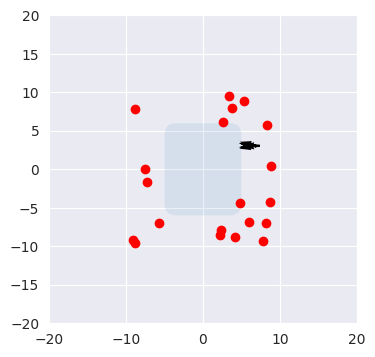

In [7]:
a = inspect_simulation(sim, beacon_pos)
a.save('./../../media/gif/simulation.gif', writer=PillowWriter(fps=30))

### Rotation

Simulation of individual influences are unbounded in the test

In [10]:
ext_rotation = rotation_influence(agent_pos[0], agent_rot[0], beacon_pos[0])
ext_rotation

0.18751643840257312

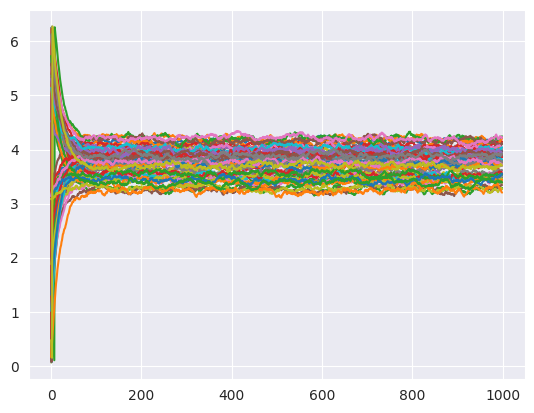

In [11]:
for i in range(len(agent_pos)):
    ext_rotation_sim = look_at_beacon(agent_pos[i], agent_rot[i], beacon_pos[-1], noise=1.0)
    plt.plot((ext_rotation_sim - np.pi) % (2 * np.pi))    

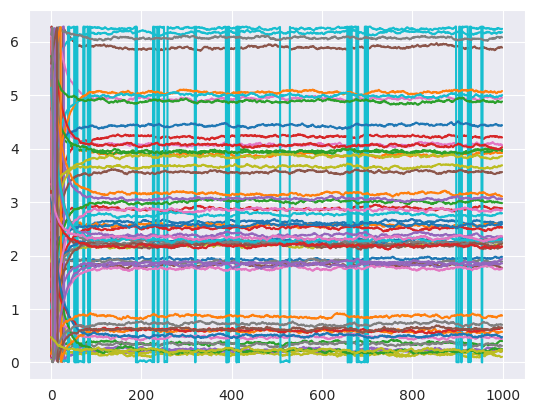

In [12]:
for i in range(len(agent_pos)):
    
    distance_to_beacon = np.linalg.norm(agent_pos[i] - beacon_pos, axis=1)
    id = np.argmin(distance_to_beacon)
    
    ext_rotation_sim = look_at_beacon(agent_pos[i], agent_rot[i], beacon_pos[id], noise=0.5)
    plt.plot((ext_rotation_sim - np.pi) % (2 * np.pi))

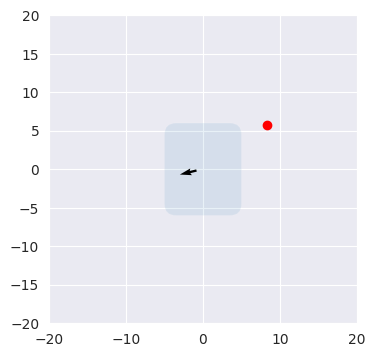

In [13]:
a = inspect_rotation_influence(ext_rotation_sim, agent_pos[-1], beacon_pos[-1])
a.save('./../../media/gif/rotation1.gif', writer=PillowWriter(fps=10))

### Position

In [100]:
p_influence = position_influence(agent_pos[-1], beacon_pos[-1], noise=0.5)

direction = np.arctan2(beacon_pos[-1, 1] - agent_pos[-1, 1], beacon_pos[-1, 0] - agent_pos[-1, 0])

print(p_influence, direction)

1.843655928941673 1.9531201


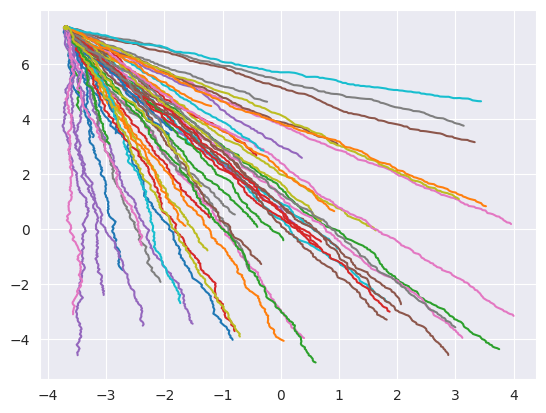

In [101]:
for i in range(len(agent_pos)):
    ext_position_sim = move_to_beacon(agent_pos[i], beacon_pos[-1], noise=1.)
    plt.plot(ext_position_sim[:,0], ext_position_sim[:,1])

In [6]:
from matplotlib.patches import Circle

[]

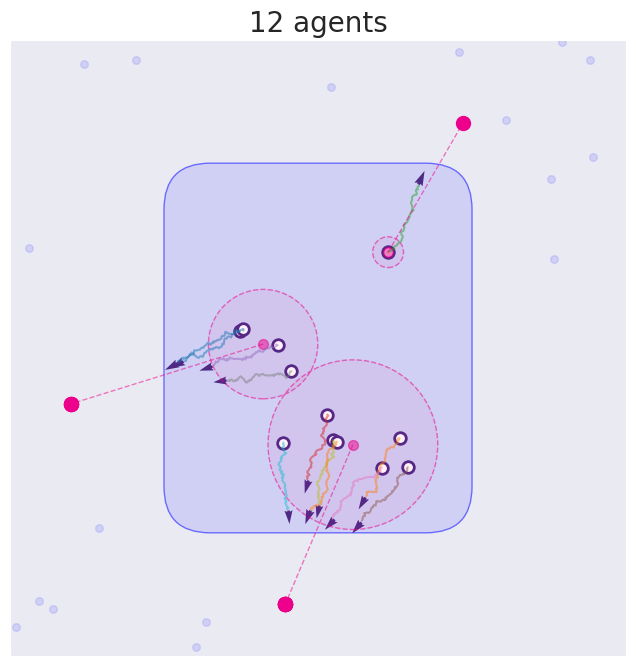

In [33]:
agent_pos, agent_rot = initialize_agents(num_agents=12, room_size=(6, 8))
beacon_pos = initialize_beacons(room_sensing_range=20, num_beacons=20, room_size=(10, 12))

f, ax = prepare_figure(figsize=(8, 8), lim=10.)
plt.scatter(beacon_pos[:,0], beacon_pos[:,1], color='#6969ff', s=30, alpha=0.2)
plt.scatter(agent_pos[:,0], agent_pos[:,1], edgecolors='#4e2a84', color='#ffffff', linewidths=2, s=70)
ids = np.zeros(len(agent_pos))
nearest_beacon_distances = np.zeros(len(agent_pos))

for i in range(len(agent_pos)):
    
    distance_to_beacon = np.linalg.norm(agent_pos[i] - beacon_pos, axis=1)
    id = np.argmin(distance_to_beacon)
    distance = distance_to_beacon[id]
    ids[i] = id
    nearest_beacon_distances[i] = distance
    
    ext_position_sim = move_to_beacon(agent_pos[i], beacon_pos[id], noise=2.5, drift=0.5)
    plt.plot(ext_position_sim[:60,0], ext_position_sim[:60,1], alpha=0.5)
    plt.quiver(
        ext_position_sim[60, 0],
        ext_position_sim[60, 1],
        ext_position_sim[60, 0] - ext_position_sim[0, 0],
        ext_position_sim[60, 1] - ext_position_sim[0, 1],
        scale=100, alpha=1, color="#4e2a84")
    plt.scatter(beacon_pos[id, 0], beacon_pos[id, 1], color="#ec008c", s=100, label="Approached Beacons")



for n in range(np.unique(ids).shape[0]):
    cluster_pos = []
    for i in range(len(agent_pos)):
        if ids[i] == np.unique(ids)[n]:
            cluster_pos.append(agent_pos[i])

    cluster_pos = np.array(cluster_pos)
    center = np.mean(cluster_pos, axis=0)
    dist_to_center = np.linalg.norm(cluster_pos - center, axis=1)
    radius = np.max(dist_to_center) + 0.5

    circle_fill = Circle(xy=center, radius=radius, color='#ec008c', alpha=0.05)
    ax.add_patch(circle_fill)
    circle_line = Circle(xy=center, radius=radius, fill=False, edgecolor="#ec008c", alpha=0.5, linewidth=1, linestyle="--")
    ax.add_patch(circle_line)

    x = [center[0], beacon_pos[int(np.unique(ids)[n]), 0]]
    y = [center[1], beacon_pos[int(np.unique(ids)[n]), 1]]
    plt.plot(x, y, color='#ec008c', linestyle='--', linewidth=1, alpha=0.5)
    plt.scatter(center[0], center[1], color='#ec008c', s=50, alpha=0.5)

ax.set_title("12 agents", fontsize=20)
ax.set_xticks([])
ax.set_yticks([])

In [26]:

np.unique(ids)

array([ 1.,  2., 12., 24., 31., 34., 36., 38.])

FileNotFoundError: [Errno 2] No such file or directory: '../media'

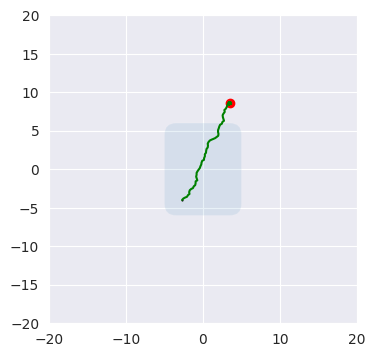

In [138]:
position_sim = move_to_beacon(agent_pos[-1], beacon_pos[-1], dt=0.5, timesteps=100, noise=1.5)
b = inspect_position_influence(position_sim, beacon_pos[-1])
b.save('./../media/gif/position1.gif', writer=PillowWriter(fps=10))

### Individual Motion

In [50]:
timesteps = 1000
num_agents = len(agent_pos)
num_beacons = len(beacon_pos)

individual_motions = np.zeros((num_agents, timesteps, 3), dtype=np.float32)

for i in range(num_agents):
    
    distance_to_beacon = np.linalg.norm(agent_pos[i] - beacon_pos, axis=1)
    id = np.argmin(distance_to_beacon)
    
    individual_sim = individual_motion(agent_pos[i], agent_rot[i], beacon_pos[id], rotation_noise=0.01, position_drift=0.1, position_noise=1.)
    
    individual_motions[i] = individual_sim

individual_motions

array([[[ 2.5629387 ,  0.31007767,  0.6404066 ],
        [ 2.5709562 ,  0.3160543 ,  0.639254  ],
        [ 2.580795  ,  0.31784254,  0.63813084],
        ...,
        [ 6.06255   ,  2.793155  ,  1.3369081 ],
        [ 6.0717845 ,  2.7893178 ,  1.2393433 ],
        [ 6.062453  ,  2.7929118 ,  1.3215659 ]],

       [[ 3.3218684 ,  4.4088964 ,  2.713333  ],
        [ 3.330169  ,  4.40332   ,  2.8651023 ],
        [ 3.3388548 ,  4.3983645 ,  3.0095265 ],
        ...,
        [ 6.07014   ,  2.7943385 ,  6.1225953 ],
        [ 6.061477  ,  2.7893424 ,  6.0063686 ],
        [ 6.0714636 ,  2.7888248 ,  6.0381474 ]],

       [[ 3.6473165 , -2.8530347 ,  0.99712676],
        [ 3.6519988 , -2.8441987 ,  1.0057336 ],
        [ 3.6565974 , -2.8353188 ,  1.0135747 ],
        ...,
        [ 6.0653305 ,  2.7864234 ,  1.9475353 ],
        [ 6.065932  ,  2.7964053 ,  1.9244909 ],
        [ 6.066017  ,  2.7864056 ,  2.0617125 ]],

       ...,

       [[ 3.2062016 ,  0.78293204,  0.50575656],
        [ 3

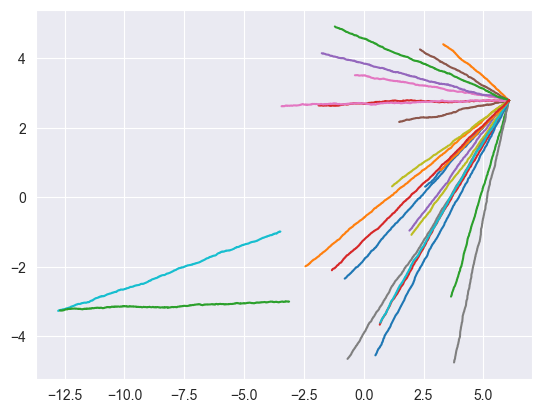

In [51]:
for i in range(num_agents):
    plt.plot(individual_motions[i, :,0], individual_motions[i, :, 1])

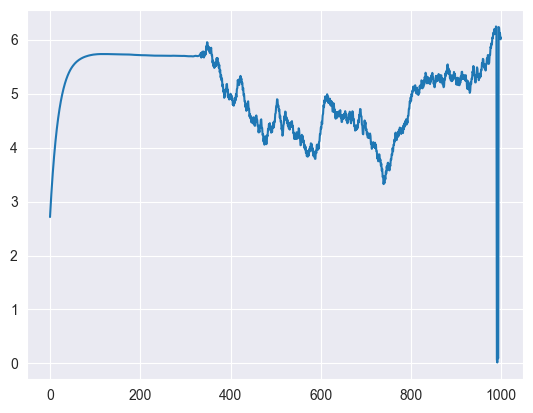

In [52]:
plt.plot(individual_motions[1,:,-1])

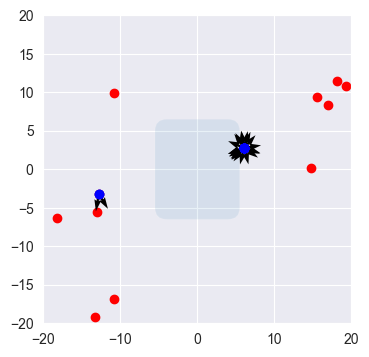

In [32]:
ind = inspect_individual_motion(individual_motions, beacon_pos)
ind.save('./../media/gif/individual1.gif', writer=PillowWriter(fps=10))

### Alignment

In [29]:
al_influence = alignment_influence(agent_pos[2], agent_pos, agent_rot)
al_influence

-1.3152211466147103

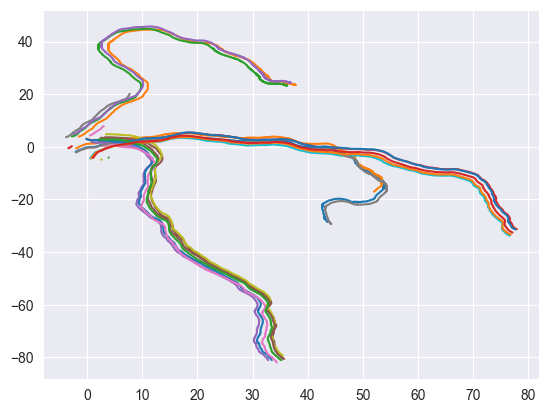

In [30]:
alignment_sim = look_with_neighbors(agent_pos, agent_rot, sensing_radius=1.5, noise=0.5)
for i in range(len(agent_pos)):
    plt.plot(alignment_sim[:,i,0], alignment_sim[:,i,1])

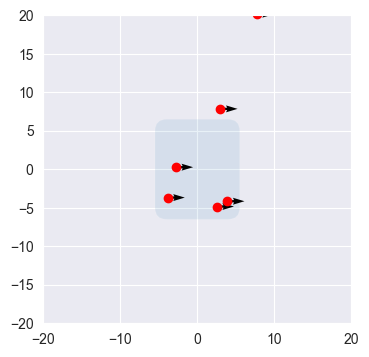

In [31]:
al = inspect_alignment_influence(alignment_sim)

al.save('./../media/gif/alignment1.gif', writer=PillowWriter(fps=10))

### Cohesion

In [32]:
co_influence = cohesion_influence(agent_pos[6], agent_pos, sensing_radius=1.5)
co_influence

-2.105657981403143

[0.52946043 4.3286567 ]
[-0.4881926   0.56526109]
[-3.00771813 -1.45750597]


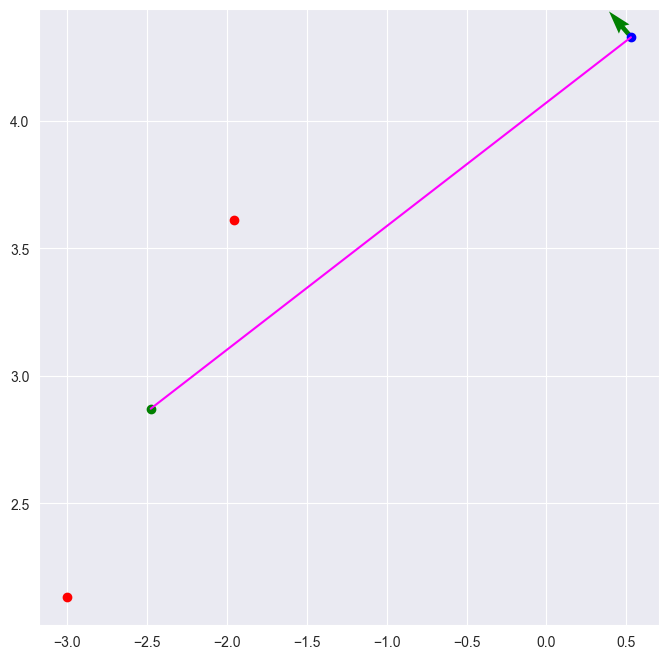

In [33]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))

self = agent_pos[6]
print(self)
neighbors = np.array([[-1.9559693,  3.6110234], [-3.000546, 2.131278]])
average = np.array([-2.4782577, 2.8711507])
corrected = np.array([-0.4881926,  0.56526109])

twopoints = np.array([self, average])
print(corrected)
print(average - self)

ax.scatter(neighbors[:,0], neighbors[:,1], color='red')
ax.scatter(average[0], average[1], color='green')
ax.quiver(self[0], self[1], corrected[0], corrected[1], color='green')
ax.scatter(self[0], self[1], color='blue')
ax.plot(twopoints[:,0], twopoints[:,1], color='magenta')

In [39]:
cohesion_sim = move_with_neighbors(agent_pos, sensing_radius=1.5, noise=0.5, drift=1.)
cohesion_sim

array([[[-2.0919323 , -1.9671919 ],
        [-2.0162005 , -0.5640334 ],
        [ 3.8905182 , -4.0508966 ],
        ...,
        [ 0.7676239 , -4.3822713 ],
        [ 2.137959  ,  2.8670912 ],
        [ 1.0218186 , -4.2190356 ]],

       [[-2.054823  , -1.8743324 ],
        [-2.0941045 , -0.62673086],
        [ 3.8099775 , -4.110169  ],
        ...,
        [ 0.8536029 , -4.3312063 ],
        [ 2.203991  ,  2.9421897 ],
        [ 0.95024216, -4.28887   ]],

       [[-2.0475843 , -1.7745948 ],
        [-2.1389732 , -0.7160998 ],
        [ 3.7255392 , -4.163743  ],
        ...,
        [ 0.80078274, -4.416118  ],
        [ 2.2289243 ,  3.0390315 ],
        [ 0.8608561 , -4.3337045 ]],

       ...,

       [[-2.4548788 , -1.1112658 ],
        [-2.415691  , -1.0167121 ],
        [ 3.2780719 , -4.1464796 ],
        ...,
        [ 0.8705144 , -4.361778  ],
        [ 1.708111  ,  3.5200036 ],
        [ 0.84354323, -4.261282  ]],

       [[-2.4371235 , -1.0128547 ],
        [-2.467253  , -1.10

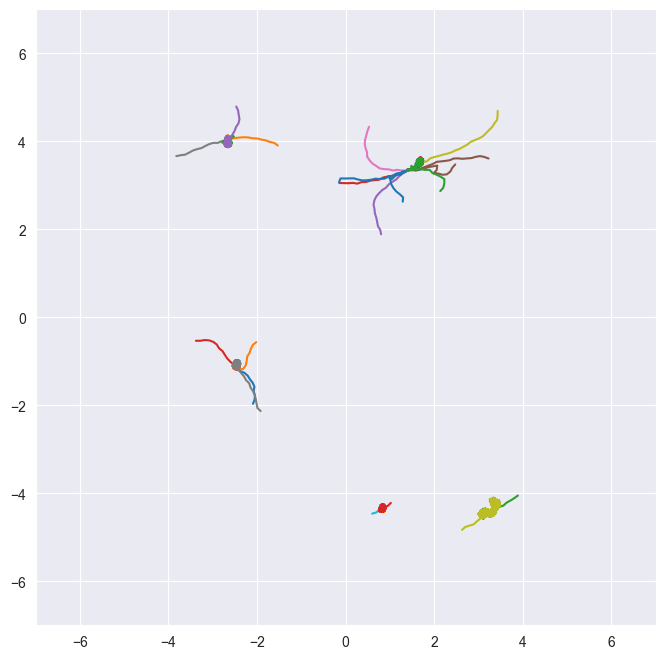

In [40]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_xlim([-7., 7.])
ax.set_ylim([-7., 7.])

for i in range(len(agent_pos)):
    ax.plot(cohesion_sim[:,i,0], cohesion_sim[:,i,1])

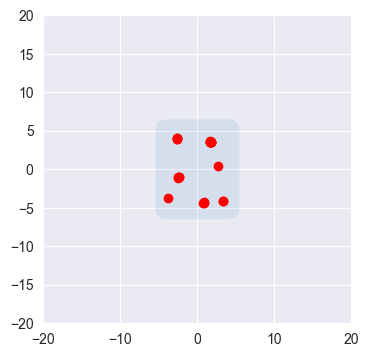

In [41]:
co = inspect_cohesion_influence(cohesion_sim)

co.save('./../media/gif/cohesion1.gif', writer=PillowWriter(fps=10))

### Combined influences

In [68]:
individual_sim = individual_motion(
    agent_position=agent_pos[-1],
    agent_rotation=agent_rot[-1],
    beacon_position=beacon_pos[-1]
)

individual_sim[:,-1]

array([0.27051014, 0.21910715, 0.17557426, 0.1448743 , 0.11628649,
       0.08082221, 0.03766322, 0.00954065, 6.27124029, 6.24408917,
       6.21794216, 6.18615073, 6.1491021 , 6.11543978, 6.08383456,
       6.05783745, 6.03810972, 6.01242087, 5.98540372, 5.96574501,
       5.94084526, 5.9332788 , 5.91530341, 5.89266685, 5.87809614,
       5.87436685, 5.86515066, 5.85223699, 5.85061509, 5.84126282,
       5.84332183, 5.82532335, 5.81515819, 5.81206817, 5.79957891,
       5.797027  , 5.78159571, 5.76496554, 5.76196814, 5.76720184,
       5.75495851, 5.73966027, 5.74248404, 5.74263132, 5.74413759,
       5.75060946, 5.74060637, 5.7272417 , 5.73420942, 5.72439212,
       5.71824265, 5.71782065, 5.72816426, 5.7242269 , 5.71742577,
       5.71845121, 5.72729189, 5.72367728, 5.72767228, 5.72388125,
       5.71910954, 5.71324653, 5.71875382, 5.72409183, 5.71785105,
       5.72312385, 5.73075647, 5.71801442, 5.72515095, 5.72429073,
       5.71582163, 5.70725173, 5.69848055, 5.68473179, 5.68142

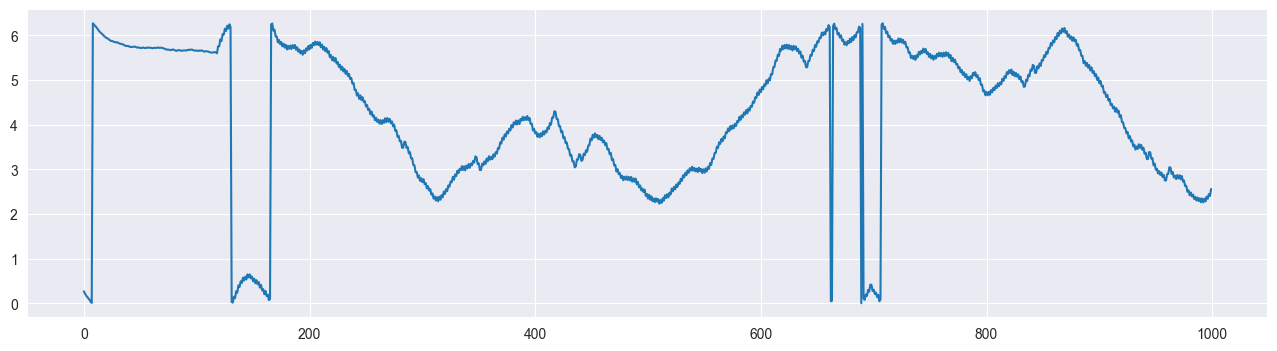

In [69]:
f, ax = plt.subplots(1, 1, figsize=(16, 4))
plt.plot(individual_sim[:,-1])

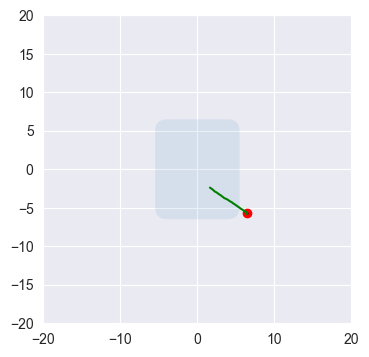

In [71]:
individual_sim_vis = inspect_position_influence(individual_sim[:,0:2], beacon_pos[-1])

individual_sim_vis.save('./../media/gif/individual1.gif', writer=PillowWriter(fps=10))

In [56]:
collective_sim = collective_motion(
    agent_positions=agent_pos,
    agent_rotations=agent_rot,
    alignment_noise=0.5,
    cohesion_noise=0.5,
)

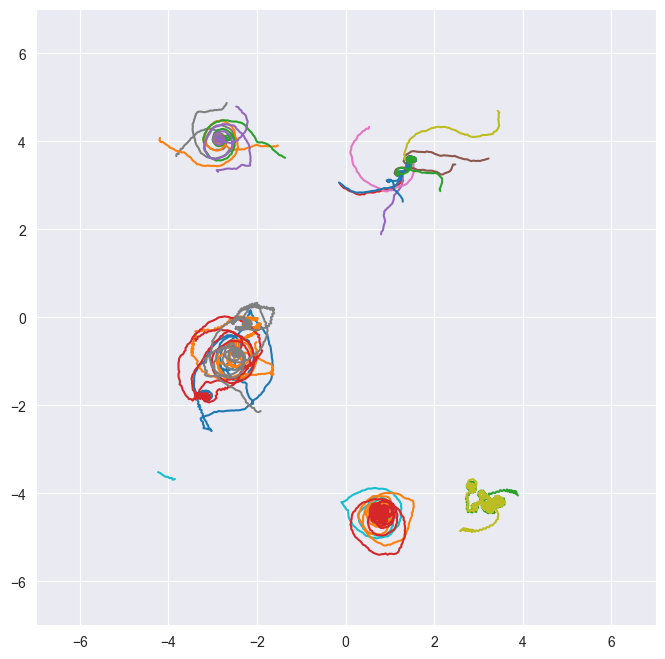

In [43]:
matplotlib quiverf, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_xlim([-7., 7.])
ax.set_ylim([-7., 7.])

for i in range(len(agent_pos)):
    ax.plot(collective_sim[:,i,0], collective_sim[:,i,1])

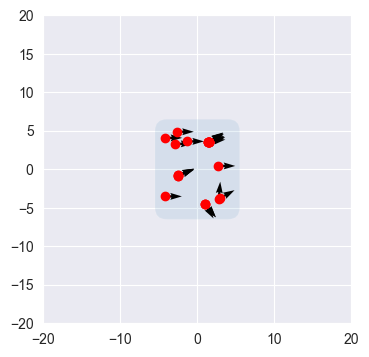

In [44]:
co_sim_vis = inspect_alignment_influence(collective_sim)

co_sim_vis.save('./../media/gif/collective1.gif', writer=PillowWriter(fps=10))